<a href="https://colab.research.google.com/github/BrooklynZhang/Network/blob/master/dqn_routing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd /content/drive/My Drive/Network Simualtor

/content/drive/My Drive/Network Simualtor


In [3]:
!pip install simpy

In [13]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
algs = ['ant', 'q', 'dijkstra', 'dqn']

def make_total_response_time_graph(device_id, device_data_set):
    fig, ax = plt.subplots()
    plt.ylabel('transmitting time')
    plt.xlabel('packet number')
    for name in algs:
        algdataset = device_data_set[name]
        dataset = algdataset[device_id]
        data = dataset['F1']
        data.sort(key=lambda l: l[0])
        y = []
        x = [data[i][0] for i in range(0, len(data) - 5, 5)]
        #y = [data[i][1] for i in range(0, len(data), 10)]
        for j in range(0, len(data) - 5, 5):
            list = [data[i][1] for i in range(j, j + 5)]
            y.append(np.mean(list)/10)
        print(name, np.mean(y))
        ax.plot(x, y, label=name)
    ax.legend()
    plt.show()

def make_graph():
  dataset = {}
  for name in algs:
    filename = name + "dataset.txt"
    with open(filename, "rb") as FILE:
      obj = pickle.loads(FILE.read())
      iab_donor_dataset = obj.iab_donor_data
      dataset[name] = iab_donor_dataset
    FILE.close()
  make_total_response_time_graph('D1', dataset)

Condition1: Only have one Flow

In [6]:
!python network.py TC1.txt q

EVENT: The Test Case File is: TC1.txt
EVENT: The Algorithm is: q
EVENT: Time List is deque([1.0, 3.0, 2.0, 0.0, 1.5, 1.0, 0.0, 0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
EVENT: Adding flow to UE U1 at 0.1
EVENT: UE U1 Send DataPacket 0 / 5000 to D1 at 0.1
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 0
EVENT: UE U1 Send DataPacket 500 / 5000 to D1 at 2.1000000000000014
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 500
EVENT: UE U1 Send DataPacket 1000 / 5000 to D1 at 4.099999999999992
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 1000
EVENT: UE U1 Send DataPacket 1500 / 5000 to D1 at 6.099999999999771
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 1500
EVENT: UE U1 Send DataPacket 2000 / 5000 to D1 at 8.099999999999552
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 2000
EVENT: UE U1 Send DataPacket 2500 / 5000 to D1 at 10.099999999999332
EVENT: IAB Donor D1 received the data p

In [7]:
!python network.py TC1.txt dijkstra

EVENT: The Test Case File is: TC1.txt
EVENT: The Algorithm is: dijkstra
EVENT: Time List is deque([1.0, 3.0, 2.0, 0.0, 1.5, 1.0, 0.0, 0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
EVENT: UE U1 Start Radar Routing at 0
EVENT: UE U2 Start Radar Routing at 0
EVENT: UE U1 receivess the Echo packet from D1 at 0.009724
EVENT: UE U1 received the Echo Packet. The path to IAB-DONOR is ['D1', 'N1A', 'N2A', 'N3A', 'U1']
EVENT: UE U2 receivess the Echo packet from D1 at 0.00998
EVENT: UE U2 received the Echo Packet. The path to IAB-DONOR is ['D1', 'N1A', 'N2A', 'N3A', 'U2']
EVENT: Adding flow to UE U1 at 0.1
EVENT: UE U1 Send DataPacket 0 / 5000 to D1 at 0.1
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 0
EVENT: UE U1 Send DataPacket 500 / 5000 to D1 at 2.1000000000000014
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 500
EVENT: UE U1 Send DataPacket 1000 / 5000 to D1 at 4.099999999999992
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 1000


In [8]:
!python network.py TC1.txt ant

EVENT: The Test Case File is: TC1.txt
EVENT: The Algorithm is: ant
EVENT: Time List is deque([1.0, 3.0, 2.0, 0.0, 1.5, 1.0, 0.0, 0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
EVENT: Adding flow to UE U1 at 0.1
EVENT: UE U1 Send DataPacket 0 / 5000 to D1 at 0.1
EVENT: UE U1 Send DataPacket 500 / 5000 to D1 at 2.1000000000000014
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 500
EVENT: UE U1 Send DataPacket 1000 / 5000 to D1 at 4.099999999999992
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 1000
EVENT: UE U1 Send DataPacket 1500 / 5000 to D1 at 6.099999999999771
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 1500
EVENT: UE U1 Send DataPacket 2000 / 5000 to D1 at 8.099999999999552
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 2000
EVENT: UE U1 Send DataPacket 2500 / 5000 to D1 at 10.099999999999332
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 2500
EVENT: UE U1 Send DataPacket 3000 

DQNs do not use legacy models

In [9]:
!python network.py TC1.txt dqn

EVENT: The Test Case File is: TC1.txt
EVENT: The Algorithm is: dqn
EVENT: Time List is deque([1.0, 3.0, 2.0, 0.0, 1.5, 1.0, 0.0, 0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
EVENT: Adding flow to UE U1 at 0.1
EVENT: UE U1 Send DataPacket 0 / 5000 to D1 at 0.1
EVENT: N3A is currently generating neural network
EVENT: N2A is currently generating neural network
EVENT: N1A is currently generating neural network
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 0
EVENT: N2B is currently generating neural network
EVENT: N2C is currently generating neural network
EVENT: N2D is currently generating neural network
EVENT: N1C is currently generating neural network
EVENT: N1B is currently generating neural network
EVENT: N2E is currently generating neural network
EVENT: UE U1 Send DataPacket 500 / 5000 to D1 at 2.1000000000000014
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 500
EVENT: UE U1 Send DataPacket 1000 / 5000 to D1 at 4.099999999999992
EVENT: IAB Donor D1 

ant 0.0036742709687568376
q 0.003631784253334473
dijkstra 0.007711440973351088
dqn 0.023838493866669634


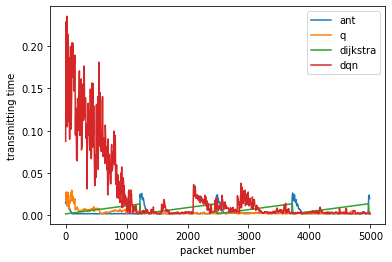

In [14]:
make_graph()

DQNs use legacy models and experience replays

TC2 TXT is same as TC1 except the legacy model is inherited

In [17]:
!python network.py TC2.txt dqn

EVENT: The Test Case File is: TC2.txt
EVENT: The Algorithm is: dqn
EVENT: Time List is deque([1.0, 3.0, 2.0, 0.0, 1.5, 1.0, 0.0, 0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
EVENT: Adding flow to UE U1 at 0.1
EVENT: UE U1 Send DataPacket 0 / 5000 to D1 at 0.1
EVENT: N3A is currently generating neural network
EVENT: N2A is currently generating neural network
EVENT: N1A is currently generating neural network
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 0
EVENT: N2B is currently generating neural network
EVENT: N1B is currently generating neural network
EVENT: N1C is currently generating neural network
EVENT: N2C is currently generating neural network
EVENT: N2D is currently generating neural network
EVENT: N2E is currently generating neural network
EVENT: UE U1 Send DataPacket 500 / 5000 to D1 at 2.1000000000000014
EVENT: IAB Donor D1 received the data packet from U1 with packet id of 500
EVENT: UE U1 Send DataPacket 1000 / 5000 to D1 at 4.099999999999992
EVENT: IAB Donor D1 

ant 0.0036742709687568376
q 0.003631784253334473
dijkstra 0.007711440973351088
dqn 0.002500299026667163


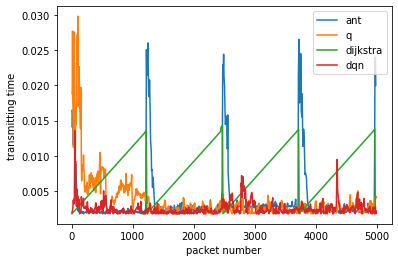

In [18]:
make_graph()



















Condition2: 10 Flows

In [19]:
!python network.py TC3.txt dijkstra

EVENT: The Test Case File is: TC3.txt
EVENT: The Algorithm is: dijkstra
EVENT: Time List is deque([1.0, 3.0, 2.0, 0.0, 1.5, 1.0, 0.0, 0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
EVENT: UE U1 Start Radar Routing at 0
EVENT: UE U2 Start Radar Routing at 0
EVENT: UE U4 Start Radar Routing at 0
EVENT: UE U5 Start Radar Routing at 0
EVENT: UE U6 Start Radar Routing at 0
EVENT: UE U7 Start Radar Routing at 0
EVENT: UE U8 Start Radar Routing at 0
EVENT: UE U9 Start Radar Routing at 0
EVENT: UE U10 Start Radar Routing at 0
EVENT: UE U11 Start Radar Routing at 0
EVENT: UE U7 receivess the Echo packet from D1 at 0.005044000000000001
EVENT: UE U7 received the Echo Packet. The path to IAB-DONOR is ['D1', 'N1A', 'U7']
EVENT: UE U8 receivess the Echo packet from D1 at 0.005044000000000001
EVENT: UE U8 received the Echo Packet. The path to IAB-DONOR is ['D1', 'N1C', 'U8']
EVENT: UE U9 receivess the Echo packet from D1 at 0.005044000000000001
EVENT: UE U9 received the Echo Packet. The path to IAB-DONOR is ['D1', '

In [20]:
!python network.py TC3.txt ant 

EVENT: The Test Case File is: TC3.txt
EVENT: The Algorithm is: ant
EVENT: Time List is deque([1.0, 3.0, 2.0, 0.0, 1.5, 1.0, 0.0, 0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
EVENT: Adding flow to UE U1 at 0.1
EVENT: UE U1 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U2 at 0.1
EVENT: UE U2 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U4 at 0.1
EVENT: UE U4 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U5 at 0.1
EVENT: UE U5 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U6 at 0.1
EVENT: UE U6 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U7 at 0.1
EVENT: UE U7 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U8 at 0.1
EVENT: UE U8 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U9 at 0.1
EVENT: UE U9 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U10 at 0.1
EVENT: UE U10 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U11 at 0.1
EVENT: UE U11 Send DataPacke

In [21]:
!python network.py TC3.txt q

EVENT: The Test Case File is: TC3.txt
EVENT: The Algorithm is: q
EVENT: Time List is deque([1.0, 3.0, 2.0, 0.0, 1.5, 1.0, 0.0, 0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
EVENT: Adding flow to UE U1 at 0.1
EVENT: UE U1 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U2 at 0.1
EVENT: UE U2 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U4 at 0.1
EVENT: UE U4 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U5 at 0.1
EVENT: UE U5 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U6 at 0.1
EVENT: UE U6 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U7 at 0.1
EVENT: UE U7 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U8 at 0.1
EVENT: UE U8 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U9 at 0.1
EVENT: UE U9 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U10 at 0.1
EVENT: UE U10 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U11 at 0.1
EVENT: UE U11 Send DataPacket 

DQNs do not use legacy Models

In [ ]:
!python network.py TC3.txt dqn

EVENT: The Test Case File is: TC3.txt
EVENT: The Algorithm is: dqn
EVENT: Time List is deque([1.0, 3.0, 2.0, 0.0, 1.5, 1.0, 0.0, 0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
EVENT: Adding flow to UE U1 at 0.1
EVENT: UE U1 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U2 at 0.1
EVENT: UE U2 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U4 at 0.1
EVENT: UE U4 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U5 at 0.1
EVENT: UE U5 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U6 at 0.1
EVENT: UE U6 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U7 at 0.1
EVENT: UE U7 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U8 at 0.1
EVENT: UE U8 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U9 at 0.1
EVENT: UE U9 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U10 at 0.1
EVENT: UE U10 Send DataPacket 0 / 4000 to D1 at 0.1
EVENT: Adding flow to UE U11 at 0.1
EVENT: UE U11 Send DataPacke

In [ ]:
make_graph()

DQNs use Legacy Model and Experience Replay pools

In [ ]:
!python network.py TC2.txt dqn

In [ ]:
make_graph()